In [ ]:
 import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt

## Reading data

In [ ]:
data = pd.read_csv("MetroData.csv")
print(data.shape)
data.head()

(2980, 17)


,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,0,01-02-2020 0.00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1,0,1,1,0,1,1,1
1,10,01-02-2020 0.00,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1,0,1,1,0,1,1,1
2,20,01-02-2020 0.00,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1,0,1,1,0,1,1,1
3,30,01-02-2020 0.00,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1,0,1,1,0,1,1,1
4,40,01-02-2020 0.00,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1,0,1,1,0,1,1,1


In [ ]:
data.dtypes

Unnamed: 0           int64
timestamp           object
TP2                float64
TP3                float64
H1                 float64
DV_pressure        float64
Reservoirs         float64
Oil_temperature    float64
Motor_current      float64
COMP                 int64
DV_eletric           int64
Towers               int64
MPG                  int64
LPS                  int64
Pressure_switch      int64
Oil_level            int64
Caudal_impulses      int64
dtype: object

In [ ]:
data['timestamp'] = pd.to_datetime(data['timestamp'],format='%d-%m-%Y %H.%M')

## Data cleaning

In [ ]:
data.drop("Unnamed: 0",axis=1, inplace=True)

In [ ]:
data=data.dropna()

### Checking for missing values

In [ ]:
data.isna().sum()

timestamp          0
TP2                0
TP3                0
H1                 0
DV_pressure        0
Reservoirs         0
Oil_temperature    0
Motor_current      0
COMP               0
DV_eletric         0
Towers             0
MPG                0
LPS                0
Pressure_switch    0
Oil_level          0
Caudal_impulses    0
dtype: int64

## Data exploration

In [ ]:
col = data.columns[2:17]

In [ ]:
col

Index(['TP3', 'H1', 'DV_pressure', 'Reservoirs', 'Oil_temperature',
       'Motor_current', 'COMP', 'DV_eletric', 'Towers', 'MPG', 'LPS',
       'Pressure_switch', 'Oil_level', 'Caudal_impulses'],
      dtype='object')

In [ ]:
df = pd.DataFrame(data, columns=['Col Name', 'Quartile1', 'Quartile2', 'Quartile3'])
for i in range(14):
  arr = np.quantile(data[col[i]], [0.25, 0.50, 0.75], interpolation='midpoint')
  df.loc[i+1] = [col[i],arr[0], arr[1], arr[2]]

<ipython-input-10-f48207d968a8>:3: DeprecationWarning: the `interpolation=` argument to quantile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  arr = np.quantile(data[col[i]], [0.25, 0.50, 0.75], interpolation='midpoint')


In [ ]:
df.loc[:14]

,Col Name,Quartile1,Quartile2,Quartile3
0,NaN,NaN,NaN,NaN
1,TP3,8.4060,8.8740,9.424
2,H1,8.1750,8.7150,9.297
3,DV_pressure,-0.0240,-0.0220,-0.018
4,Reservoirs,8.4060,8.8760,9.425
5,Oil_temperature,55.8375,59.9750,65.150
6,Motor_current,0.0400,0.0425,3.810
7,COMP,1.0000,1.0000,1.000
8,DV_eletric,0.0000,0.0000,0.000
9,Towers,1.0000,1.0000,1.000


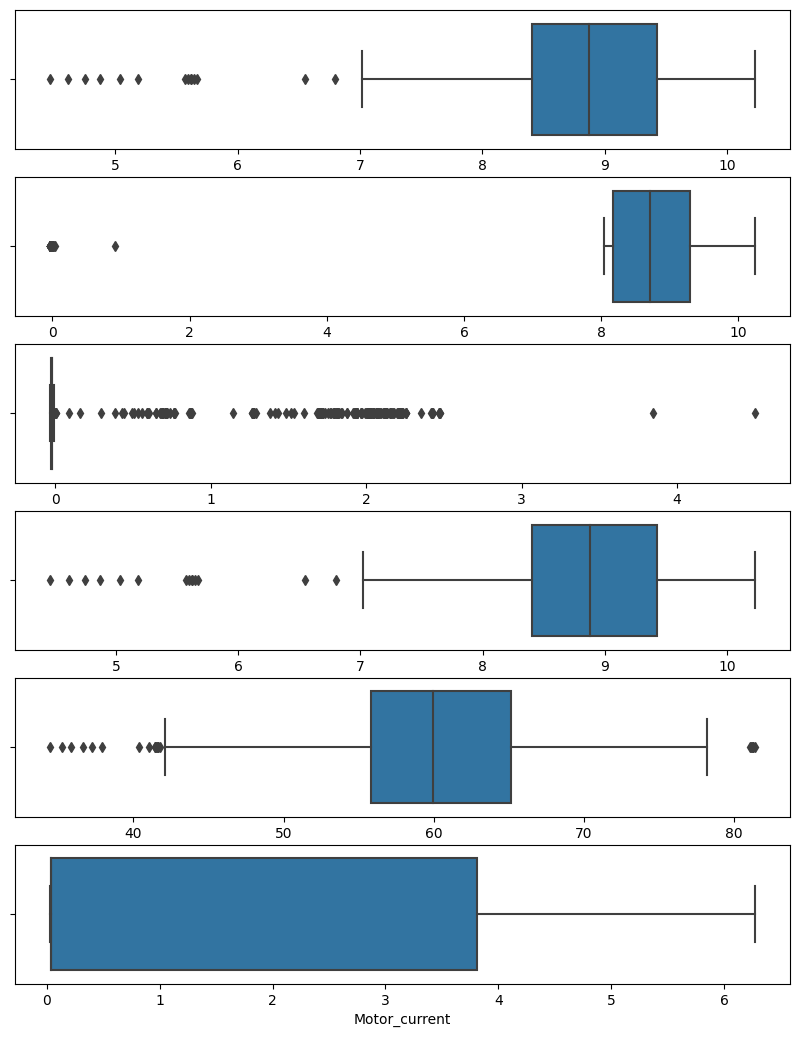

In [ ]:
plt.figure(figsize = (10,30))
for i in range(6):
    plt.subplot(14, 1, i+1)
    sns.boxplot(data=data, x=col[i])

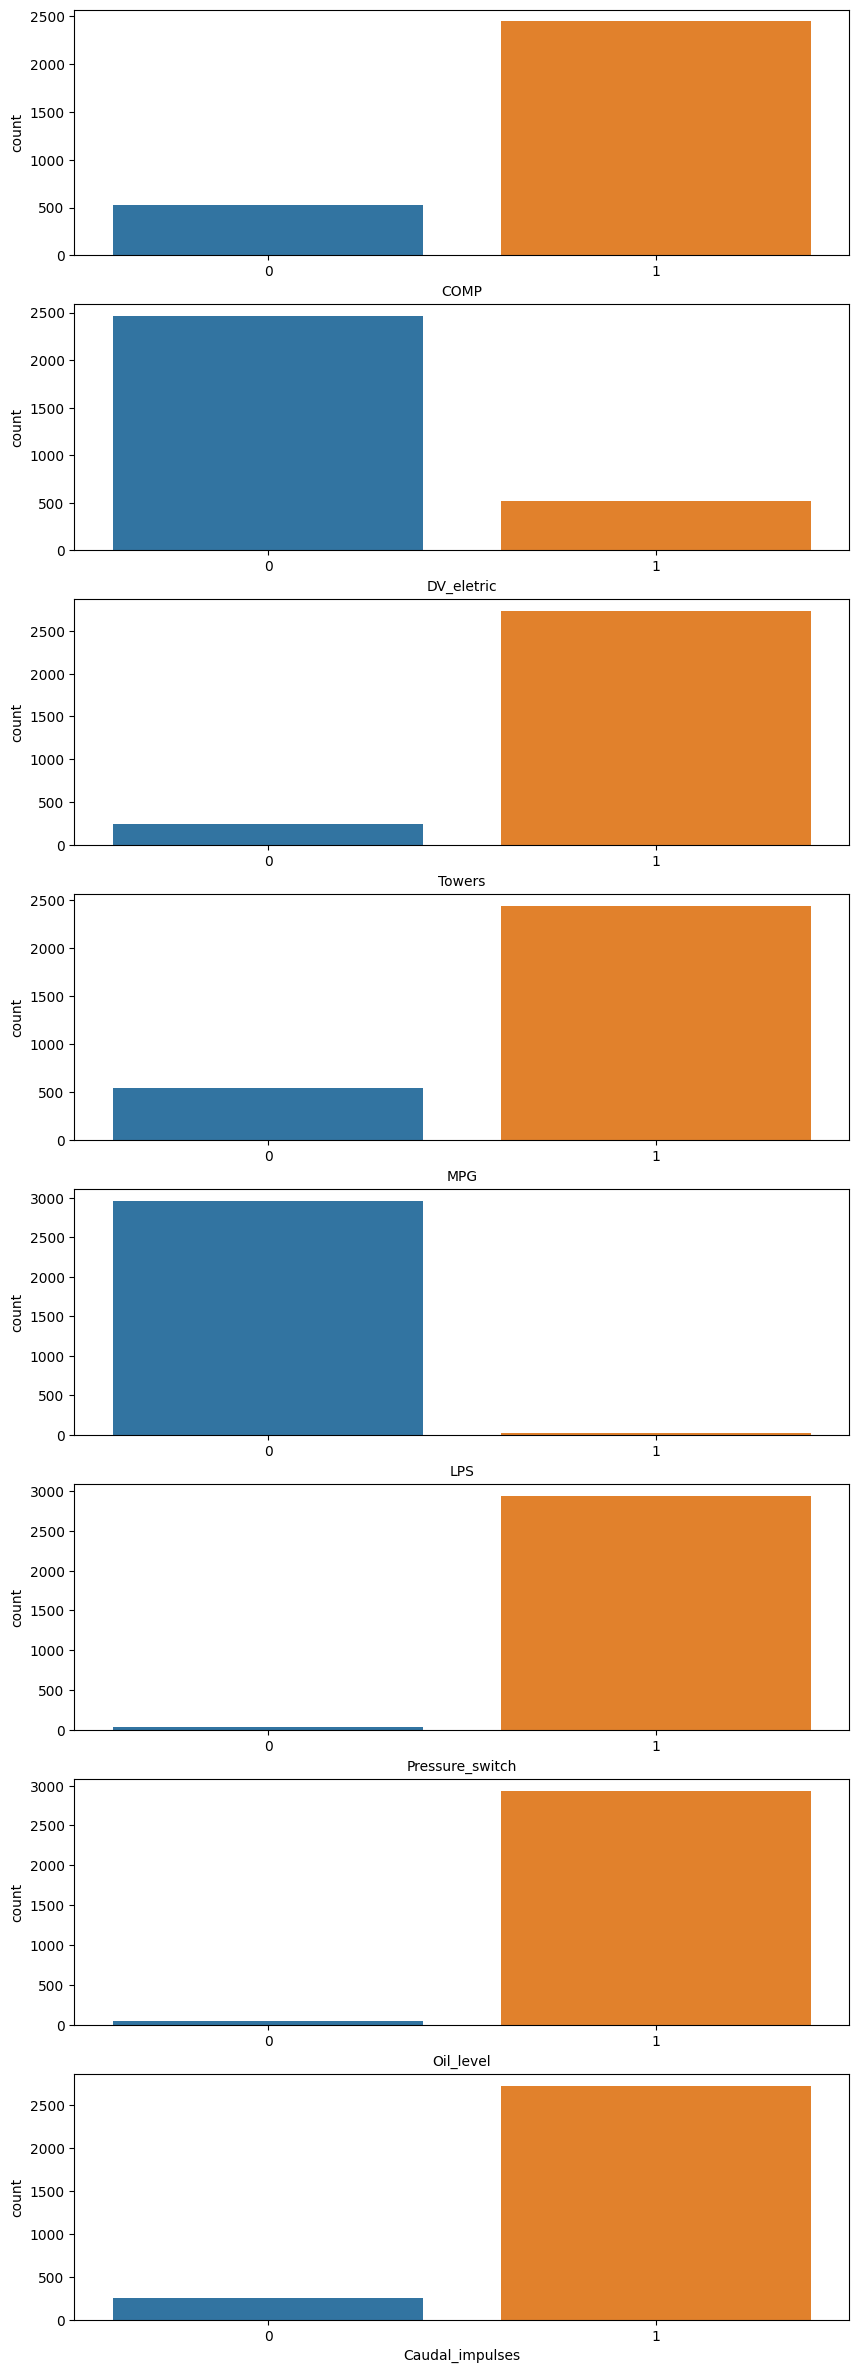

In [ ]:
plt.figure(figsize = (10,30))
for i in range(6, 14):
    plt.subplot(8, 1, i-5)
    sns.countplot(data=data, x=col[i])


<ipython-input-14-9c937e6aeda0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<Axes: >

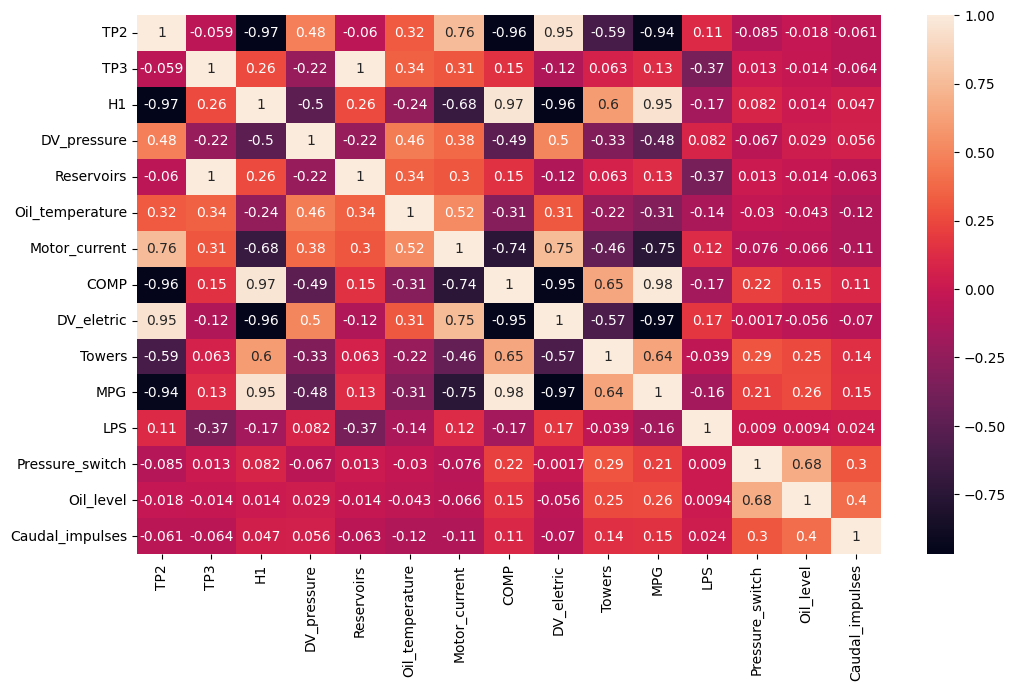

In [ ]:
corr = data.corr()
plt.figure(figsize = (12,7))
sns.heatmap(corr,annot=True, )

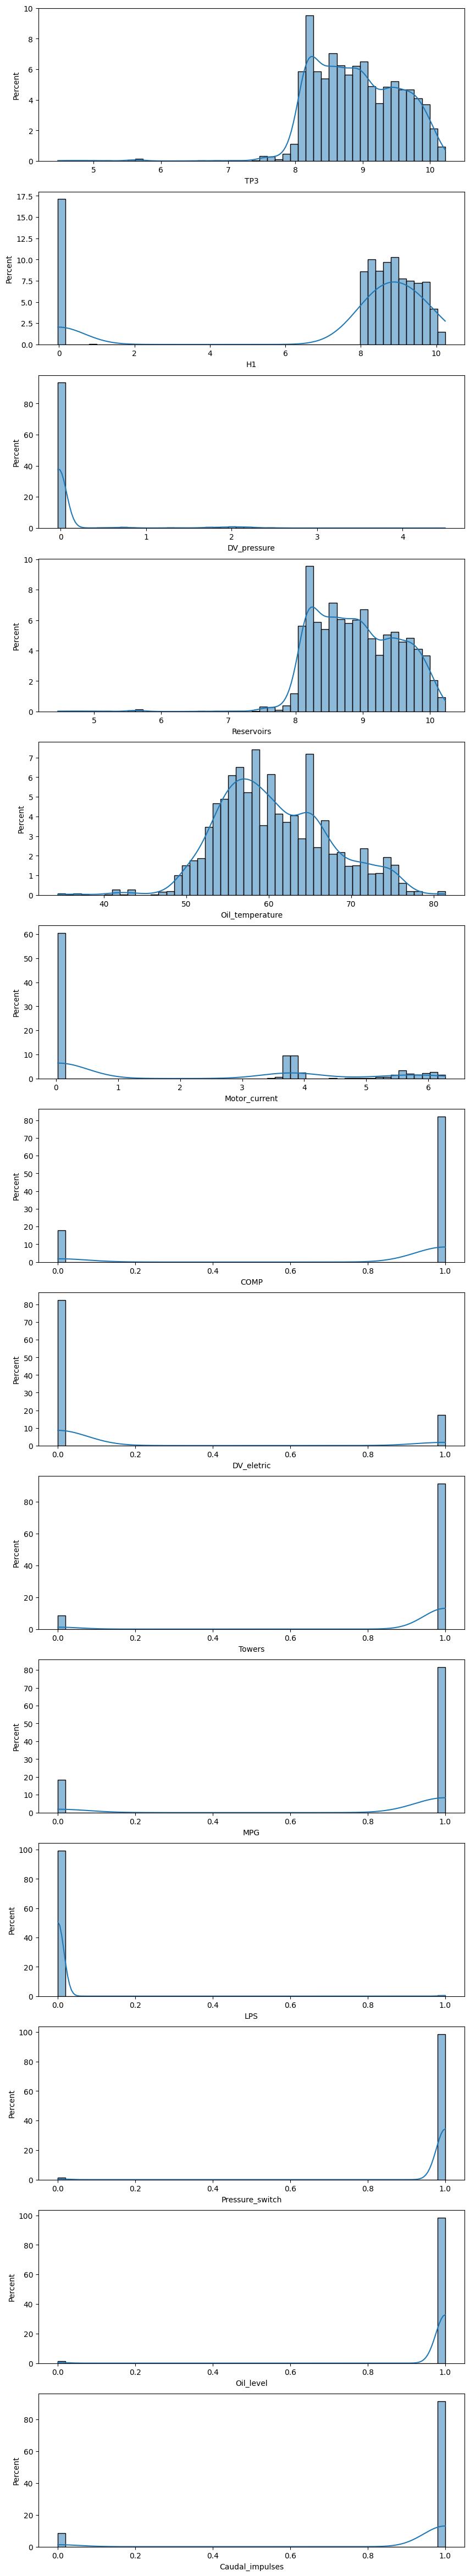

In [ ]:
plt.figure(figsize = (10,60))
for i in range(14):
    plt.subplot(14, 1, i+1)
    sns.histplot(data=data, x=data[col[i]],stat='percent', common_norm=True, kde=True, bins=50)

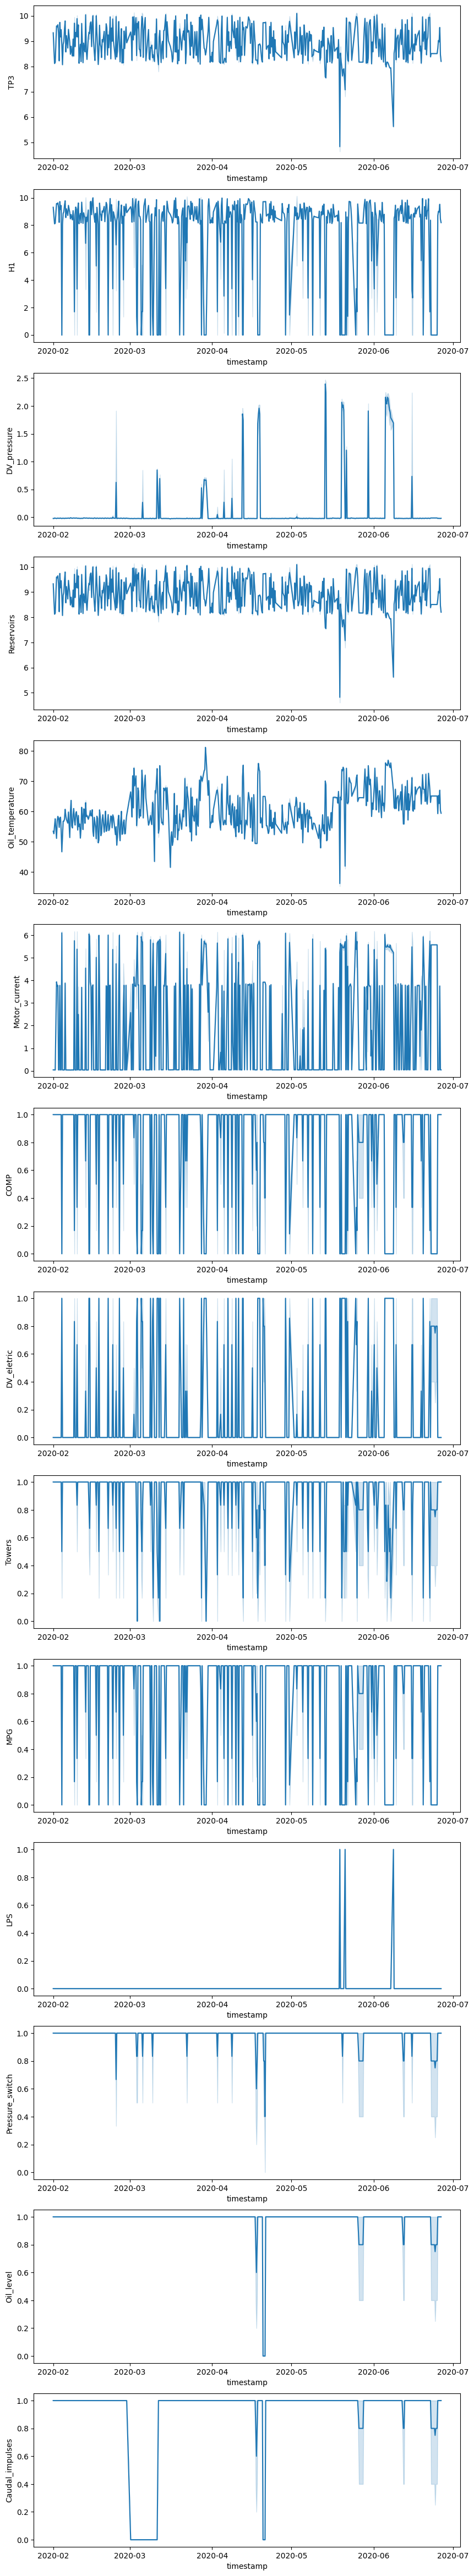

In [ ]:
plt.figure(figsize = (10,60))
for i in range(14):
    plt.subplot(14, 1, i+1)
    #sns.histplot(data=data, x=data[col[i]],stat='percent', common_norm=True, kde=True, bins=50)
    sns.lineplot(data, y=data[col[i]], x=data['timestamp'])

## Clustering data to get the taret variable

In [ ]:
# Prepare the data for clustering
X = data[col]

In [ ]:
# Standardize the data (important for K-Means)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Determine the optimal number of clusters (using the Elbow method)
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

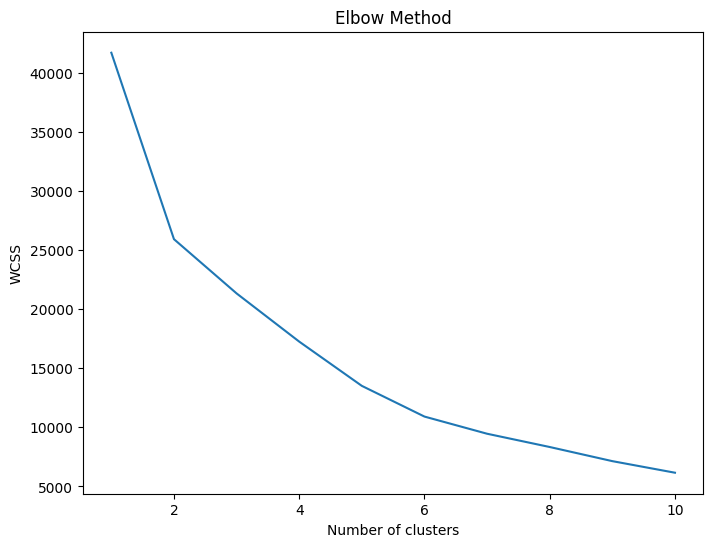

In [ ]:
# Plot the Elbow method to find the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-Cluster Sum of Squares
plt.show()

Thus the optimal number of clusters is 2 which would represent whather the train require maintainence or not

## KMeans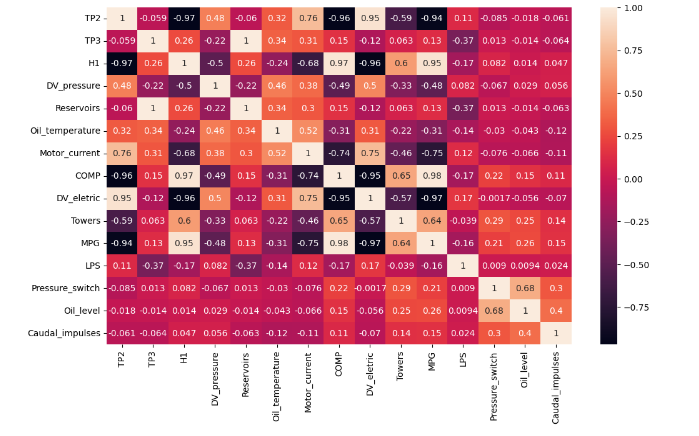 Clustering

In [ ]:
# Based on the Elbow method, choose the optimal number of clusters (e.g., 3)
optimal_num_clusters = 2

In [ ]:
# Apply K-Means clustering with the chosen number of clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=optimal_num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X_scaled)

KMeans(n_clusters=2, n_init=10, random_state=0)

In [ ]:
# Add the cluster labels to the original dataset
data['KmeansCluster'] = kmeans.labels_

([<matplotlib.patches.Wedge at 0x7f4ea0af04c0>,
 [Text(-0.9221163624364038, 0.5997511268243311, '0'),
  Text(0.9221163905127793, -0.5997510836569483, '1')],
 [Text(-0.5029725613289475, 0.3271369782678169, '81.64'),
  Text(0.5029725766433341, -0.3271369547219718, '18.36')])

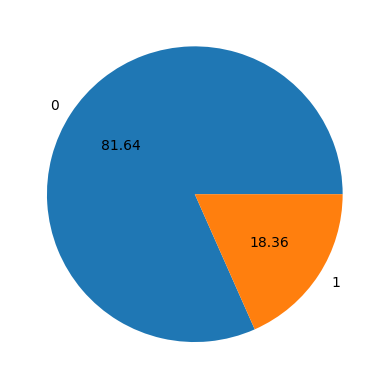

In [ ]:
a = data['KmeansCluster'].value_counts()
plt.pie(a.values, labels = a.index, autopct='%.2f')

## Hierarchical clustering using KMeans

In [ ]:
from sklearn.cluster import AgglomerativeClustering
# Hierarchical clustering
agg_clustering = AgglomerativeClustering(n_clusters=2)  # Adjust the number of clusters as needed
agg_labels = agg_clustering.fit_predict(X)

In [ ]:
# Combine hierarchical and k-means clustering
agg_kmeans_labels = AgglomerativeClustering(n_clusters=2, linkage="ward", affinity="euclidean").fit_predict(kmeans.cluster_centers_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
# Add the cluster labels to the original dataset
data['AggKmeansCluster'] = agg_clustering.labels_

([<matplotlib.patches.Wedge at 0x7f4e9c53f7f0>,
 [Text(-0.3144547621424051, 1.0540959171564812, '1'),
  Text(0.31445476214240475, -1.0540959171564814, '0')],
 [Text(-0.17152077935040277, 0.5749614093580806, '59.23'),
  Text(0.17152077935040258, -0.5749614093580807, '40.77')])

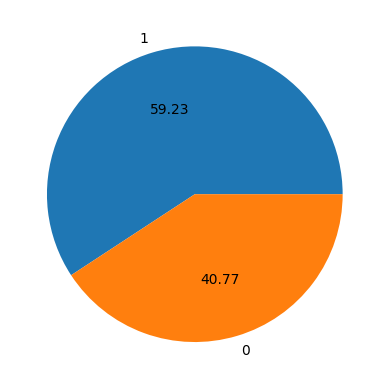

In [ ]:
a = data['AggKmeansCluster'].value_counts()
plt.pie(a.values, labels = a.index, autopct='%.2f')

## Gaussian Mixture

In [ ]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=optimal_num_clusters)  # Specify the number of clusters
clusters = gmm.fit_predict(X)

In [ ]:
# Add the cluster labels to the original dataset
data['GaussianCluster'] = kmeans.labels_

([<matplotlib.patches.Wedge at 0x7f4e9c56bc10>,
 [Text(-0.9221163624364038, 0.5997511268243311, '0'),
  Text(0.9221163905127793, -0.5997510836569483, '1')],
 [Text(-0.5029725613289475, 0.3271369782678169, '81.64'),
  Text(0.5029725766433341, -0.3271369547219718, '18.36')])

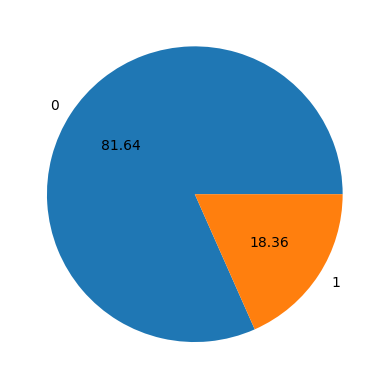

In [ ]:
a = data['GaussianCluster'].value_counts()
plt.pie(a.values, labels = a.index, autopct='%.2f')

### Cluster Result Analysis

<ipython-input-33-bf91a4a9f1af>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cluster[i]] = data[cluster[i]]


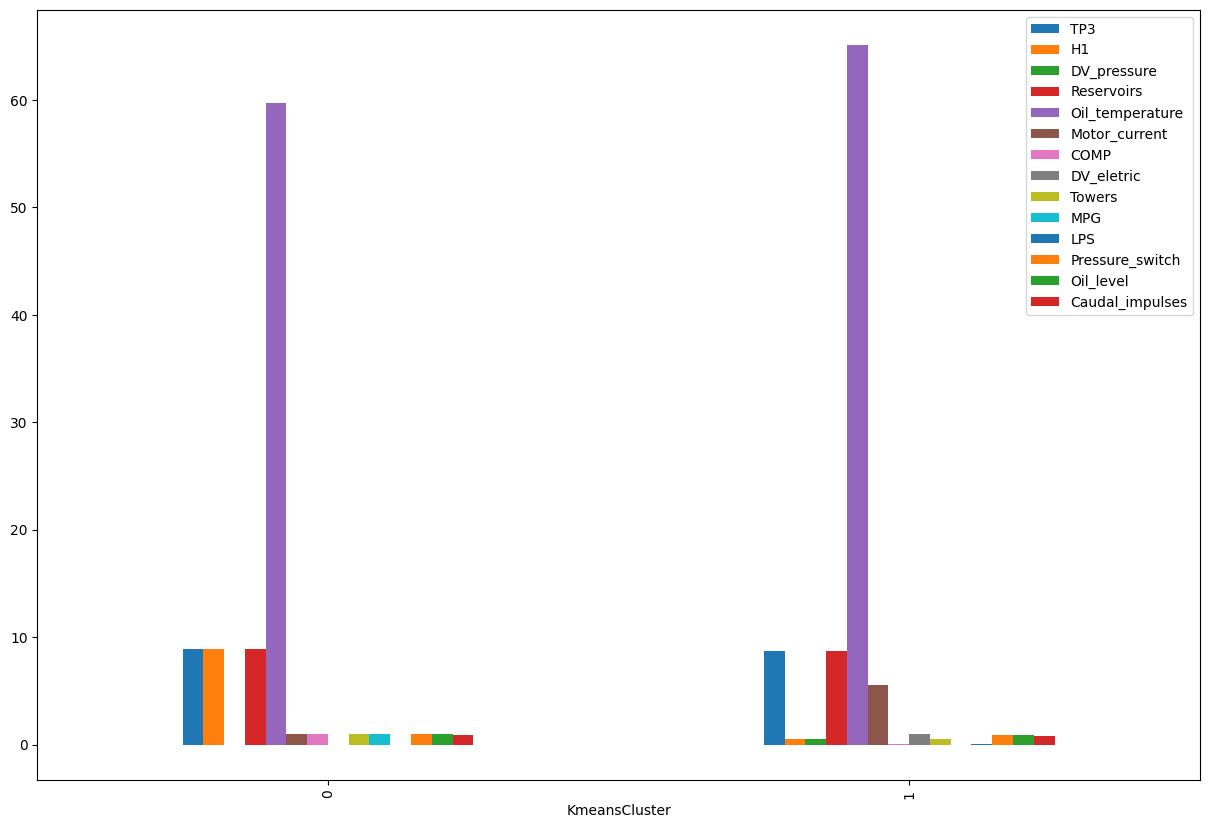

<ipython-input-33-bf91a4a9f1af>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(cluster[i], axis=1, inplace=True)
<ipython-input-33-bf91a4a9f1af>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cluster[i]] = data[cluster[i]]


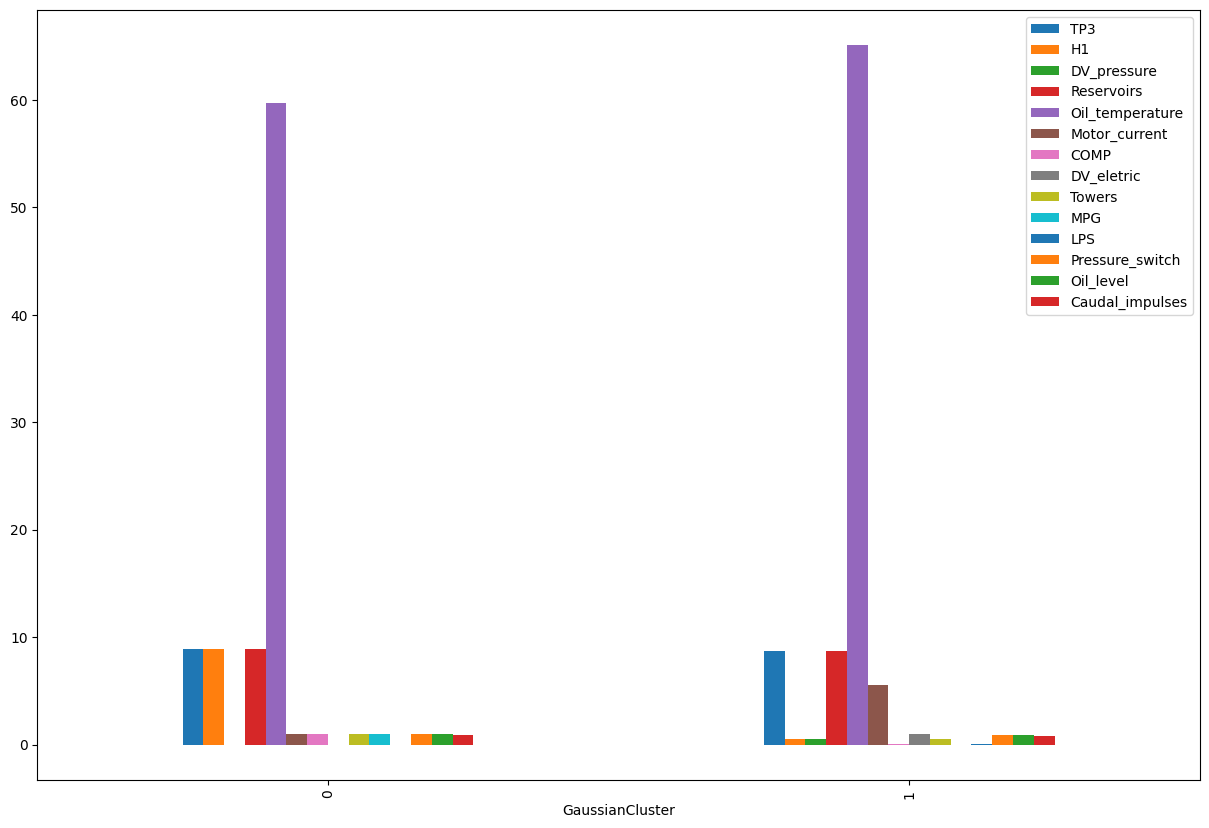

<ipython-input-33-bf91a4a9f1af>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(cluster[i], axis=1, inplace=True)
<ipython-input-33-bf91a4a9f1af>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cluster[i]] = data[cluster[i]]


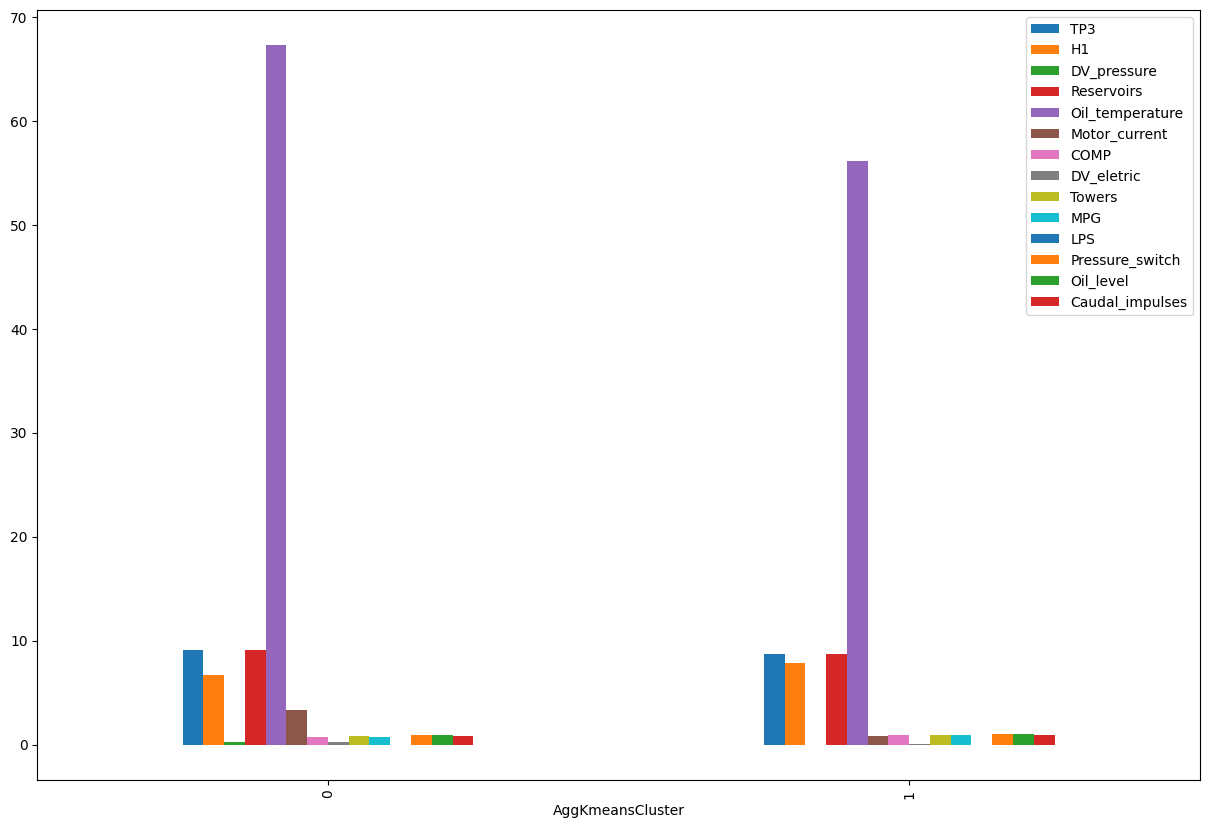

<ipython-input-33-bf91a4a9f1af>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(cluster[i], axis=1, inplace=True)


In [ ]:
df = data[col]
cluster = ['KmeansCluster', 'GaussianCluster', 'AggKmeansCluster']
graph = 1
for i in range(3):
  df[cluster[i]] = data[cluster[i]]
  cluster_grouped1 = df.groupby(cluster[i])
  cluster_properties1 = cluster_grouped1.mean()
  cluster_properties1.plot(kind='bar', figsize=(15, 10))
  plt.show()
  df.drop(cluster[i], axis=1, inplace=True)

Thus, we conclude that KMeans Algorithm and Gaussian Algorithm gives clusters representing the near identical group of instances in the data. So, we can assume that the clusters of both algorithms are same.

* ***Cluster 0*** -> Instances where no manitainece is required
* ***Cluster 1*** -> instance where maintainance is required

In [ ]:
data['cluster'] = data['KmeansCluster']
data.drop(cluster, axis=1, inplace=True)
data.head()

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,cluster
0,2020-02-01,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1,0,1,1,0,1,1,1,0
1,2020-02-01,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1,0,1,1,0,1,1,1,0
2,2020-02-01,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1,0,1,1,0,1,1,1,0
3,2020-02-01,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1,0,1,1,0,1,1,1,0
4,2020-02-01,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1,0,1,1,0,1,1,1,0


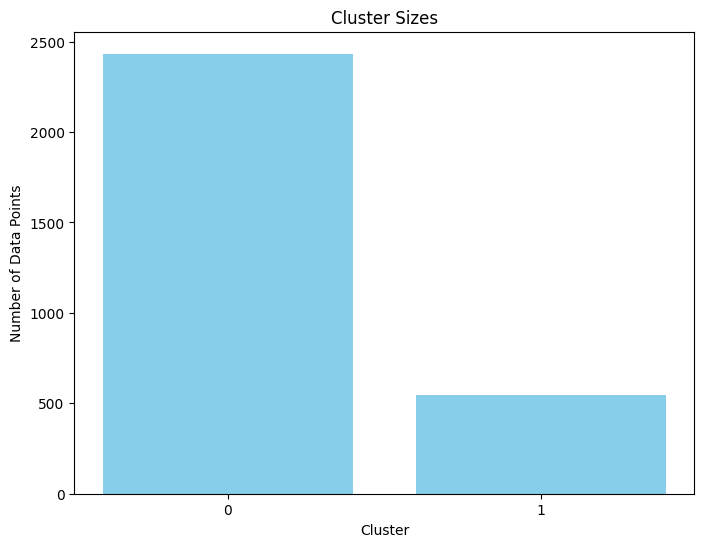

In [ ]:
# Count the number of data points in each cluster
cluster_counts = data['cluster'].value_counts()

# Sort the clusters by size (optional, for clearer visualization)
cluster_counts = cluster_counts.sort_index()

# Create a bar chart to visualize cluster sizes
plt.figure(figsize=(8, 6))
plt.bar(cluster_counts.index, cluster_counts.values, color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.title('Cluster Sizes')
plt.xticks(cluster_counts.index)
plt.show()